# Python Class That Calculates Distances

Python class that calculates distances in n dimensional spaces.

In [1]:
import pandas as pd
# import numpy as np

In [96]:
class ndist:    
    # d(p,q) = sqrt(((p1-q1)**2) + ((p2-q2)**2) + ... + ((pn-qn)**2))
    def standardize_col(col, mean, sd):
        if sd == 0:
            return(0)
        else:
            return((col - mean) / sd)
    
    def dataframe(p, q, std=True):
        data = {'p':p,'q':q}
        data_frame = pd.DataFrame(data)
        
        if std:
            mean = data_frame['p'].mean()
            sd = data_frame['p'].std()
            data_frame['p'] = data_frame['p'].apply(ndist.standardize_col,
                                                    args=[mean, sd])

            mean = data_frame['q'].mean()
            sd = data_frame['q'].std()
            data_frame['q'] = data_frame['q'].apply(ndist.standardize_col,
                                                    args=[mean, sd])
        else:
            print('Standardization set to False.')
        
        data_frame['sq_distances'] = (data_frame['p'] - 
                                      data_frame['q'])**2
        return(data_frame)
    
    def distance(p, q, std=True):
        from math import sqrt
        distance = sqrt(ndist.dataframe(p,q,std)['sq_distances'].sum())
        return(distance)
    
    def dimensions(p, q):
        dimensions = len(ndist.dataframe(p,q))
        return(dimensions)  

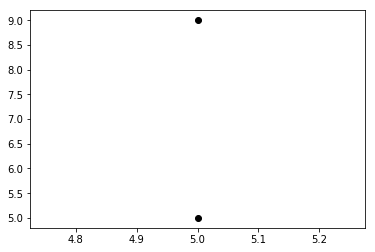

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.plot([5,5],[9,5], 'o', color='black');

In [101]:
ndist.distance([5,5,5,5,5],[5,5,5,5,500], std=True)

2.0

In [99]:
ndist.dataframe([5,5,5,5,5],[5,5,5,5,500], std=False)

Standardization set to False.


,p,q,sq_distances
0,5,5,0
1,5,5,0
2,5,5,0
3,5,5,0
4,5,500,245025


In [104]:
ndist.distance([5,5],[9,5], std=False)

Standardization set to False.


4.0

In [105]:
ndist.distance([5,5],[9,5], std=True)

0.9999999999999999